In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [2]:
wavelength = 3.2e-02  # Довжина хвилі в метрах
a_r = 13e-02   # Розмір рупора по осі a в метрах
b_r = 13e-02   # Розмір рупора по осі b в метрах
theta = np.arange(0.01, np.pi / 2, 0.01)  # Кути theta для розрахунків

In [3]:
#Векторні обчислення
def calculate_FH(theta, wavelength, a_r):
    F1h = abs((1 + np.cos(theta)) / 2)
    FC = abs(np.cos((np.pi * a_r * np.sin(theta)) / wavelength) / 
             (1 - ((2 * a_r * np.sin(theta)) / wavelength)**2))
    FH = F1h * FC
    return F1h, FC, FH

def calculate_FE(theta, wavelength, b_r):
    F1e = abs((1 + np.cos(theta)) / 2)
    FC = abs(np.sin((np.pi * b_r * np.sin(theta)) / wavelength) / 
             ((np.pi * b_r * np.sin(theta)) / wavelength))
    FE = F1e * FC
    return F1e, FC, FE

In [4]:
#Площини H та E
F1h, FC_H, FH = calculate_FH(theta, wavelength, a_r)
F1e, FC_E, FE = calculate_FE(theta, wavelength, b_r)

In [5]:
#Інтерполюємо для точного визначення ширини головної пелюстки
interp_FH = interp1d(FH, theta, kind='linear', bounds_error=False, fill_value='extrapolate')
interp_FE = interp1d(FE, theta, kind='linear', bounds_error=False, fill_value='extrapolate')

In [6]:
#Ширина головної пелюстки
SGP1 = 2 * np.degrees(interp_FH(0.707))
SGP2 = 2 * np.degrees(interp_FE(0.707))

print(SGP1)
print(SGP2)

16.70394229500961
12.468474393197788


In [7]:
# Векторне знаходження максимумів та мінімумів
def find_peaks_and_troughs(F, theta):
    # Обчислюємо різниці між сусідніми значеннями
    d_F = np.diff(F)
    
    # Знаходимо індекси максимумів: де різниця змінюється з позитивної на негативну
    peaks_idx = np.where((d_F[:-1] > 0) & (d_F[1:] < 0))[0] + 1
    
    # Знаходимо індекси мінімумів: де різниця змінюється з негативної на позитивну
    troughs_idx = np.where((d_F[:-1] < 0) & (d_F[1:] > 0))[0] + 1
    
    # Перетворюємо індекси на кути θ та відповідні значення функції
    peaks_x = np.round(np.degrees(theta[peaks_idx]), 2)
    peaks_y = F[peaks_idx]
    troughs_x = np.round(np.degrees(theta[troughs_idx]), 2)
    troughs_y = np.zeros_like(troughs_x)
    
    return peaks_x, peaks_y, troughs_x, troughs_y

# Знаходимо максимуми і мінімуми для площин H та E
max_x_FH, max_y_FH, min_x_FH, min_y_FH = find_peaks_and_troughs(FH, theta)
max_x_FE, max_y_FE, min_x_FE, min_y_FE = find_peaks_and_troughs(FE, theta)

print(f"Значення нульових кутів в площині H: {', '.join(map(str, min_x_FH))} \u00b0")
print(f"Значення нульових кутів в площині E: {', '.join(map(str, min_x_FE))} \u00b0")

Значення нульових кутів в площині H: 21.77, 37.82, 59.59 °
Значення нульових кутів в площині E: 14.32, 29.22, 47.56, 80.21 °


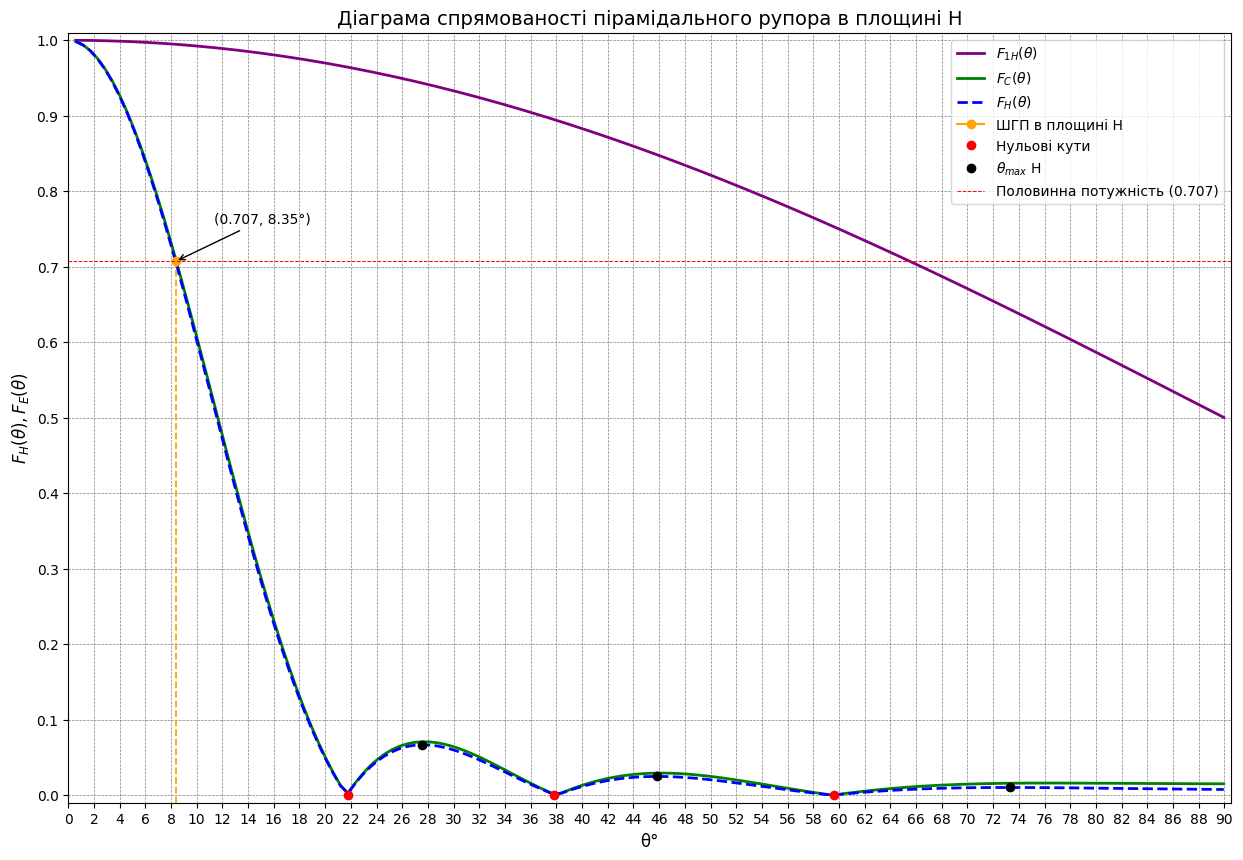

In [8]:
# Графік для площини H
plt.figure(figsize=(15, 10))

# Побудова графіків ДС для H
plt.plot(np.degrees(theta), F1h, label="$ F_{1H}(θ) $", linestyle="solid", color="purple", linewidth=2)
plt.plot(np.degrees(theta), FC_H, label="$ F_{C}(θ) $", linestyle="solid", color="green", linewidth=2)
plt.plot(np.degrees(theta), FH, label="$ F_{H}(θ) $", linestyle="dashed", color="blue", linewidth=2)

# Позначаємо знайдені інтерпольовані точки для ШГП
plt.plot(SGP1 / 2, 0.707, marker="o", color='orange', label="ШГП в площині H")

# Додаємо анотацію для ШГП
plt.annotate(f'(0.707, {SGP1 / 2:.2f}\u00b0)',
             xy=(SGP1 / 2, 0.707),
             xytext=((SGP1 / 2) + 3, 0.757),
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

# Позначаємо нульові кути
plt.plot(min_x_FH, min_y_FH, 'ro', label="Нульові кути")

# Позначаємо максимуми
plt.plot(max_x_FH, max_y_FH, "o", color="black", label="$ \\theta_{max} $ H")

# Додаємо вертикальні та горизонтальні лінії для ШГП
plt.axhline(y=0.707, color="red", linestyle="dashed", label="Половинна потужність (0.707)", linewidth=0.7)
plt.axvline(x=SGP1 / 2, ymin=0, ymax=0.707, color="orange", linestyle="dashed", linewidth=1.3)

# Форматування графіку
plt.xlabel("θ" + '\u00b0', fontsize=12)
plt.ylabel("$ F_H(θ), F_E(θ) $", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray')
plt.title("Діаграма спрямованості пірамідального рупора в площині H", fontsize=14)

# Налаштування візуалізації осей
plt.xticks(np.arange(0, 100, 2), fontsize=10)
plt.yticks(np.arange(0, 1.2, 0.1), fontsize=10)
plt.ylim(-0.01, 1.01)
plt.xlim(0, 90.5)

plt.show()

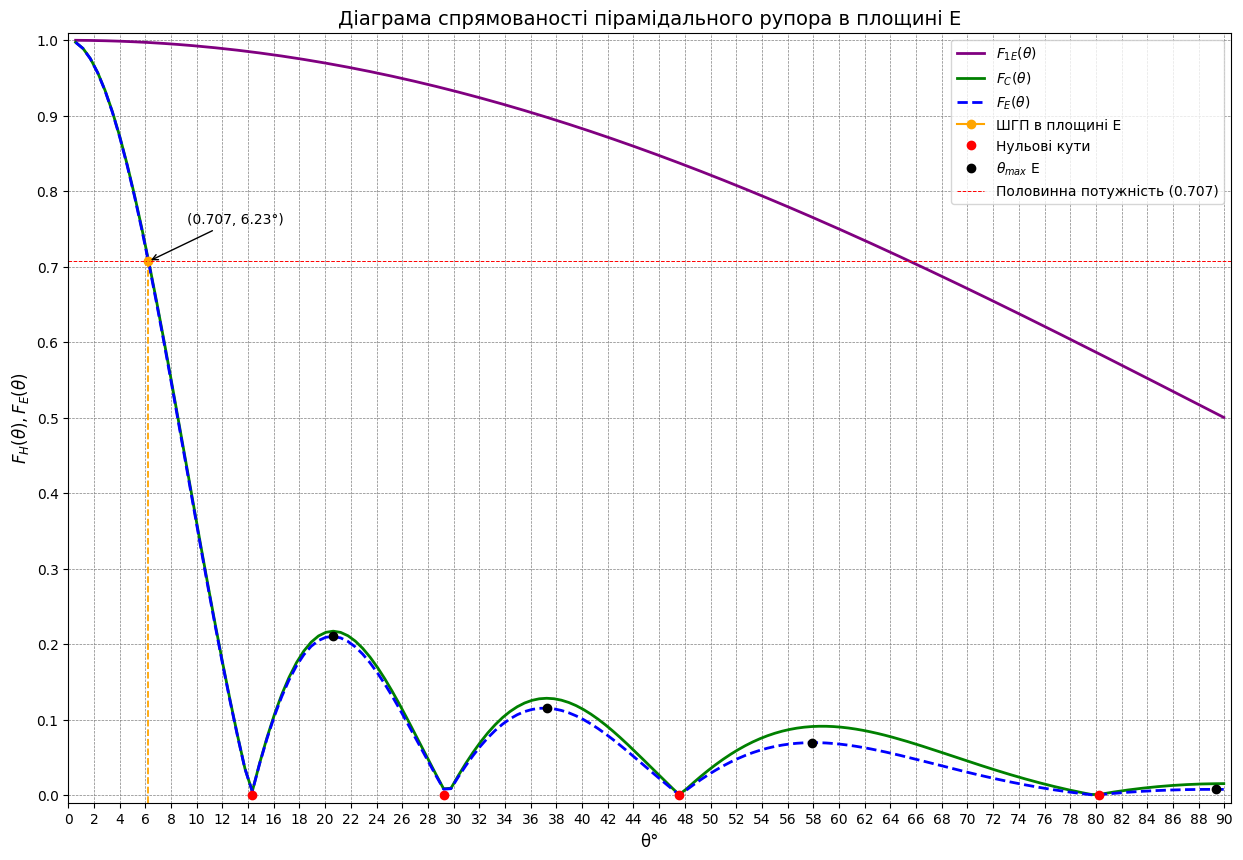

In [9]:
# Графік для площини E
plt.figure(figsize=(15, 10))

# Побудова графіків ДС для E
plt.plot(np.degrees(theta), F1e, label="$ F_{1E}(θ) $", linestyle="solid", color="purple", linewidth=2)
plt.plot(np.degrees(theta), FC_E, label="$ F_{C}(θ) $", linestyle="solid", color="green", linewidth=2)
plt.plot(np.degrees(theta), FE, label="$ F_{E}(θ) $", linestyle="dashed", color="blue", linewidth=2)

# Позначаємо знайдені інтерпольовані точки для ШГП
plt.plot(SGP2 / 2, 0.707, marker="o", color='orange', label="ШГП в площині E")

# Додаємо анотацію для ШГП
plt.annotate(f'(0.707, {SGP2 / 2:.2f}\u00b0)',
             xy=(SGP2 / 2, 0.707),
             xytext=((SGP2 / 2) + 3, 0.757),
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

# Позначаємо нульові кути
plt.plot(min_x_FE, min_y_FE, 'ro', label="Нульові кути")

# Позначаємо максимуми
plt.plot(max_x_FE, max_y_FE, "o", color="black", label="$ \\theta_{max} $ E")

# Додаємо вертикальні та горизонтальні лінії для ШГП
plt.axhline(y=0.707, color="red", linestyle="dashed", label="Половинна потужність (0.707)", linewidth=0.7)
plt.axvline(x=SGP2 / 2, ymin=0, ymax=0.707, color="orange", linestyle="dashed", linewidth=1.3)

# Форматування графіку
plt.xlabel("θ" + '\u00b0', fontsize=12)
plt.ylabel("$ F_H(θ), F_E(θ) $", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray')
plt.title("Діаграма спрямованості пірамідального рупора в площині E", fontsize=14)

# Налаштування візуалізації осей
plt.xticks(np.arange(0, 100, 2), fontsize=10)
plt.yticks(np.arange(0, 1.2, 0.1), fontsize=10)
plt.ylim(-0.01, 1.01)
plt.xlim(0, 90.5)

plt.show()